# Overview of this jupyter notebook

### Purpose: Data understanding of each classes without data modification
1. Loading screwing data 
2. Average curve shape in the initial phase
3. Rise point of the curves
4. Maximum value of the curves
5. High values in the initial phase
6. Rename files

In [6]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tq
import importlib
from library import etl_data as etl        # this module contains functions that load, visualize and save the data
from library import faps_color as fapsc    # this module contains the color combination of FAPS Institute
print(importlib.reload(etl))
print(importlib.reload(fapsc))

<module 'library.etl_data' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. PA_FAPS\\04_Code\\library\\etl_data.py'>
<module 'library.faps_color' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. PA_FAPS\\04_Code\\library\\faps_color.py'>


## 1. Loading screwing data

In [7]:
main_path = "..\\03_Schraubprozessdaten\\einzelne_klassen\\"
folders = os.listdir(main_path)
fname = "\\ast11-graph_"
fname_new = "\\class0_"

In [8]:
folders

['0_in_ordnung',
 '1_kleine_durchgangsbohrung_v2',
 '2_falsch_ausgerichtete_fuegepartner_v3',
 '3_unebene_fuegeflaeche',
 '4_verunreinigtes_gewinde',
 '5_verschmutzte_schraube',
 '6_fremdkoerper_am_gewindeende',
 '7_beschaedigte_schraube']

In [9]:
class0 = '0_in_ordnung'

In [105]:
def set_time(df, len_curves):
    
    original_time_step = 0.000175
    max_time = max(len_curves)*original_time_step
    len_datapoints = len(df)
    time_steps = round(max_time/len_datapoints, 4)
    
    timeline = []

    for i in range(len_datapoints):
        i = round(i*time_steps, 4)
        timeline.append(i)
        
    return np.array(timeline).reshape(-1, 1)

In [106]:
def load_data(main_path, folders, fname, downsample, file_amount):
    
    arr = []
    len_curves = []
    short_curves = []
    low_curves = []

    for i in tq(range(file_amount)):
        try:
            file_path = main_path + folders + fname + str(i) + ".csv"
            data = pd.read_csv(file_path, encoding = 'ISO-8859-1')["Drehmoment(N·m)"]
            arr.append(data)
            len_curves.append(len(data))
        except:
            print(i)
        
    for index, length in enumerate(len_curves): 
        if length < np.max(len_curves)*0.8:
            short_curves.append(index)
        
    df = pd.concat(arr, axis=1, ignore_index=True)
    df = df[:][::downsample]
    df = df.reset_index(drop=True)
    df[df < 0] = np.nan
    df = df.fillna(0)
    
    for col in df:
        if max(df[col]) < 1.0:
            low_curves.append(col)
    
    return df, len_curves, short_curves, low_curves

In [107]:
df0, len_curves, short_curves, low_curves = load_data(main_path, class0, fname_new, downsample=20, file_amount=800)

  0%|          | 0/800 [00:00<?, ?it/s]

In [108]:
df0

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.00448,0.00896,0.00448,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.03136,0.00896
1,0.00448,0.00896,0.00000,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.02688,0.00896
2,0.00896,0.00896,0.00000,0.01792,0.00896,0.00896,0.00896,0.00448,0.01792,0.00896,...,0.00896,0.00896,0.00000,0.00448,0.00448,0.01792,0.00896,0.01344,0.00896,0.01344
3,0.00896,0.01344,0.00000,0.00896,0.00000,0.00896,0.00000,0.00000,0.01344,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00448,0.01344,0.00896,0.01344,0.00448,0.01344
4,0.01344,0.01792,0.00000,0.01792,0.00896,0.01344,0.00896,0.00448,0.01792,0.00896,...,0.00448,0.00896,0.00000,0.00448,0.00896,0.01792,0.00896,0.01792,0.00896,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.38080,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
771,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.20160,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
772,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
773,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [109]:
short_curves

[]

In [110]:
low_curves

[]

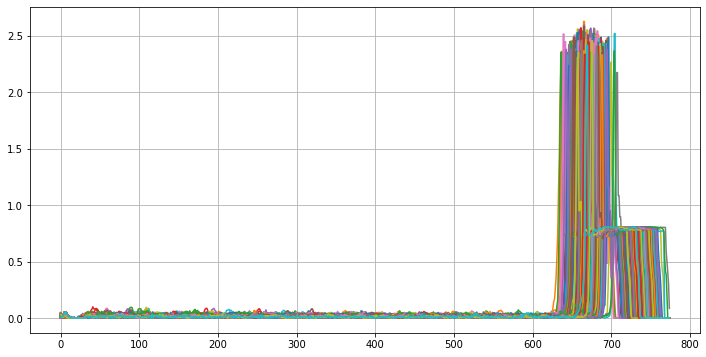

In [112]:
plt.figure(figsize=(12,6))
plt.plot(df0)
plt.grid()
plt.show()

## 2. Average curve shape in the initial phase 

In [113]:
df0p1 = df0.iloc[:600]
df0p1

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.00448,0.00896,0.00448,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.03136,0.00896
1,0.00448,0.00896,0.00000,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.02688,0.00896
2,0.00896,0.00896,0.00000,0.01792,0.00896,0.00896,0.00896,0.00448,0.01792,0.00896,...,0.00896,0.00896,0.00000,0.00448,0.00448,0.01792,0.00896,0.01344,0.00896,0.01344
3,0.00896,0.01344,0.00000,0.00896,0.00000,0.00896,0.00000,0.00000,0.01344,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00448,0.01344,0.00896,0.01344,0.00448,0.01344
4,0.01344,0.01792,0.00000,0.01792,0.00896,0.01344,0.00896,0.00448,0.01792,0.00896,...,0.00448,0.00896,0.00000,0.00448,0.00896,0.01792,0.00896,0.01792,0.00896,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.00896,0.00448,0.01792,0.02240,0.00896,0.01792,0.00448,0.00000,0.01792,0.00000,...,0.01792,0.01344,0.02688,0.02240,0.01344,0.01344,0.00448,0.01344,0.00896,0.02240
596,0.00448,0.01344,0.00000,0.02240,0.00000,0.02688,0.00448,0.00448,0.00448,0.00000,...,0.00896,0.01344,0.01344,0.00896,0.01344,0.01344,0.00896,0.00896,0.00448,0.01792
597,0.00000,0.00448,0.00000,0.02240,0.00000,0.01792,0.00000,0.00000,0.00000,0.00000,...,0.00448,0.00896,0.01792,0.00896,0.00896,0.00896,0.00448,0.00000,0.00896,0.01792
598,0.00896,0.00448,0.00896,0.03136,0.01344,0.01792,0.00000,0.00896,0.00448,0.01344,...,0.01792,0.02240,0.01792,0.00448,0.01792,0.00896,0.00448,0.00896,0.00896,0.02240


In [114]:
np.mean(df0p1, axis=1)

0      0.015075
1      0.014370
2      0.010265
3      0.005606
4      0.011967
         ...   
595    0.006412
596    0.006345
597    0.004710
598    0.006821
599    0.006306
Length: 600, dtype: float64

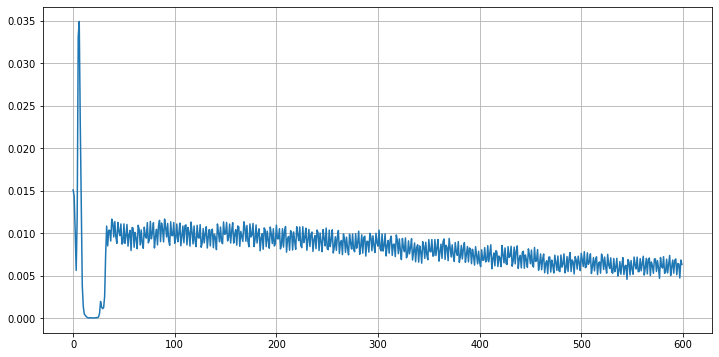

In [115]:
plt.figure(figsize=(12,6))
plt.plot(np.mean(df0p1, axis=1))
plt.grid()
plt.show()

## 3. Rise point of the curves

In [116]:
raise_point = []

for col in df0:
    for i, val in enumerate(df0[col]):
        if val > 1:
            raise_point.append(i)
            break

In [117]:
np.mean(raise_point)

667.26125

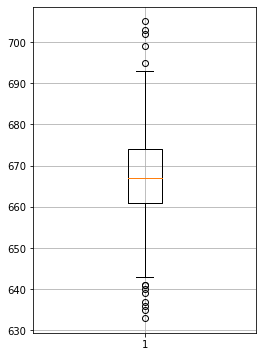

In [118]:
plt.figure(figsize=(4,6))
plt.boxplot(raise_point)
plt.grid()
plt.show()

## 4. Maximum value of the curves

In [119]:
max_values = []
max_low = []

for col in df0:
    max_values.append(max(df0[col]))
    
    if max(df0[col]) < 2.1:
        max_low.append(col)

In [120]:
max_low

[]

In [121]:
np.mean(max_values)

2.3796976

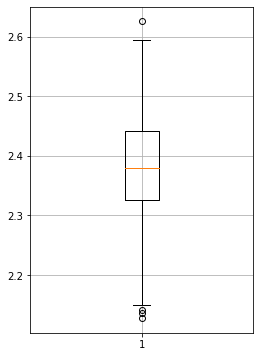

In [122]:
plt.figure(figsize=(4,6))
plt.boxplot(max_values)
plt.grid()
plt.show()

## 5. High values in the initial phase

In [90]:
p1high = []

for col in df0p1:
    if (df0p1[df0p1>0.05][col].count() > 14) | (max(df0p1[col]) > 0.1):
        p1high.append(col)

In [91]:
len(p1high)

15

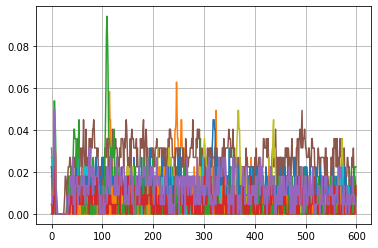

In [124]:
plt.plot(df0p1[p1high])
plt.grid()
plt.show()

In [93]:
problem_col = max_low + p1high
len(problem_col)

18

In [97]:
sorted(problem_col)

[45,
 81,
 133,
 135,
 136,
 187,
 195,
 260,
 266,
 275,
 293,
 415,
 443,
 520,
 648,
 695,
 776,
 796]

In [95]:
good_col = [x for x in df0.columns if x not in problem_col]
len(good_col)

800

## 6. Rename files

In [98]:
def rename_csv(main_path, folder, fname_new, file_amount):
    
    for i in range(file_amount):
        old = os.path.join(main_path, folder, os.listdir(main_path + folder)[i])
        new = os.path.join(main_path, folder, fname_new + str(i) + ".csv")
        #print(i)
        os.rename(old, new)

In [99]:
old = os.path.join(main_path, class0, os.listdir(main_path + class0)[0])
old

'..\\Daten\\einzelne_klassen\\0_in_ordnung\\rename (1).csv'

In [100]:
new = os.path.join(main_path, class0, "class0_" + str(0) + ".csv")
new

'..\\Daten\\einzelne_klassen\\0_in_ordnung\\class0_0.csv'

In [101]:
#rename_csv(main_path, class0, "class0_", file_amount=800)